# Ural Federal University- Май 2022
## Межгалактический Хакатон 2022
Датасет Dataset to Support Research in the Design of Secure Water Treatment Systems (SWaT dataset) -<br>
https://drive.google.com/u/0/uc?id=18BYm7zwvKvA4xdLsWgrWxNwYt4ttGcUJ&export=download&confirm=t<br>
Ссылка на GitHub c репозиторием - https://github.com/EkaterinaVZ/hackathon_2022
________________________________________________________________________________
##Часть 3/3

И Dataset to Support Research in the Design of Secure Water Treatment Systems (SWaT dataset)

### Данный код выполняет следующие дейсвия:
<ul> <li>Для начала необходимо запустить часть 1, для создания файла csv с подготовленными и обработанными данными</li> 
<li>Считывает упомянутый выше файл csv (пункт 1 списка)</li>
<li>Оценивает работу модели AutoEncoder() для данного набора данных</li>
<li>Представляет результаты с использованием confusing matrixes и scores</li>
</ul>

## Log
<p>Результаты проверки модели на данных с включенным в них столбцом Timestamp показали, что включать данные нецелесообразно, на результаты положительный эффект не оказывают.</p>

**Сделаем воду чистой и улучшим экологию!**

# Anomaly Detection by Auto Encoder (Deep Learning) in PyOD

Импорт основных библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

Подключение Google диска

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Собираем результаты работы классификатора в этот фрейм данных

## Импортируем библиотеки<br>
Предварительно устанавливаем библиотеку pyod

In [3]:
!pip install pyod
import pyod

     |████████████████████████████████| 120 kB 7.6 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Created wheel for pyod: filename=pyod-1.0.1-py3-none-any.whl size=147473 sha256=597c5bf90fd38375488d93e6ee39532020a4da94bb5b6cebdf964cb410f64df3
  Stored in directory: /root/.cache/pip/wheels/ea/c4/29/67ad87835b209f72e4706369c683741b09490f2829d64ea768
Successfully built pyod
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [4]:
import numpy as np
import pandas as pd
from pyod.models.knn import KNN
from pyod.models.auto_encoder import AutoEncoder
from pyod.utils.data import generate_data
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Хакатон_2022/Datasets/FIX_Attack.csv', delimiter=';')

In [6]:
y = pd.DataFrame(data['A/N'])
y.shape

(441798, 1)

In [7]:
X = data.drop(columns='A/N')
X.shape

(441798, 44)

In [8]:
X.head(3)

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT501,FIT502,FIT503,FIT504,P501,PIT501,PIT502,PIT503,FIT601,P602
0,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,1.723789,1.279621,0.735269,0.307786,2,250.8652,1.649953,189.5988,0.000128,1
1,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,1.723789,1.297554,0.735269,0.307786,2,250.8652,1.649953,189.6789,0.000128,1
2,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,1.723404,1.293967,0.735269,0.308619,2,250.8812,1.649953,189.6789,0.000128,1


In [9]:
y.head(3)

,A/N
0,0
1,0
2,0


# Разделение данных на обучающую и тестовую части для быстрой проверки гипотезы

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [11]:
X_train.shape[0], y_train.shape[0], X_test.shape[0], y_test.shape[0]

(309258, 309258, 132540, 132540)

# Стандартизируем данные

In [12]:
from sklearn.preprocessing import StandardScaler

X_train = StandardScaler().fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = StandardScaler().fit_transform(X_test)
X_test = pd.DataFrame(X_test)

# Проводим анализ главных компонент (PCA – principal component analysis) 

In [13]:
from sklearn.decomposition import PCA

pca = PCA(2)
x_pca = pca.fit_transform(X_train)
x_pca = pd.DataFrame(x_pca)
x_pca.columns=['PC1', 'PC2']

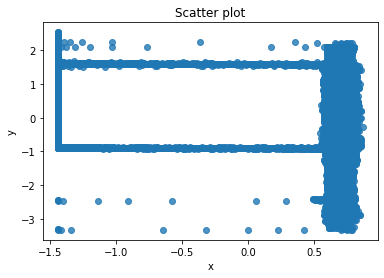

In [14]:
# Plot
import matplotlib.pyplot as plt

plt.scatter(X_train[0], X_train[1], alpha=0.8)
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Обучение модели

**Не забывай проверять число входных и выходных сигналов == кол-ву столбцов!!!**

In [15]:
clf1 = AutoEncoder(hidden_neurons =[44, 2, 2, 44], epochs=30, l2_regularizer=2.96)
clf1.fit(X_train)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 44)                1980      
                                                                 
 dropout (Dropout)           (None, 44)                0         
                                                                 
 dense_1 (Dense)             (None, 44)                1980      
                                                                 
 dropout_1 (Dropout)         (None, 44)                0         
                                                                 
 dense_2 (Dense)             (None, 44)                1980      
                                                                 
 dropout_2 (Dropout)         (None, 44)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 9

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=30,
      hidden_activation='relu', hidden_neurons=[44, 2, 2, 44],
      l2_regularizer=2.96,
      loss=<function mean_squared_error at 0x7f227fdbcc20>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

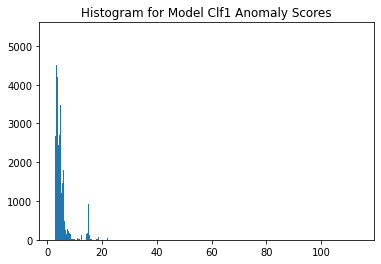

In [16]:
# Получить показатели выбросов для train data
y_train_scores = clf1.decision_scores_  

# Предсказать аномальные показатели
y_test_scores = clf1.decision_function(X_test)  # показатели выбросов
y_test_scores = pd.Series(y_test_scores)

# Строим 
import matplotlib.pyplot as plt

plt.hist(y_test_scores, bins='auto')  
plt.title("Histogram for Model Clf1 Anomaly Scores")
plt.show()

In [17]:
clf1.threshold_

8.524850604766046

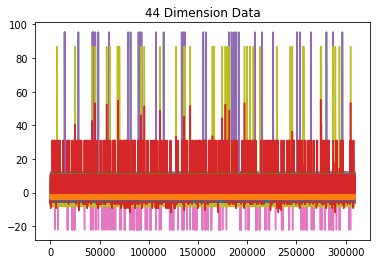

In [19]:
X_train.plot(legend=None, title="44 Dimension Data")

Text(0.5, 1.0, 'Anomaly Scored with automatically calculated threshold')

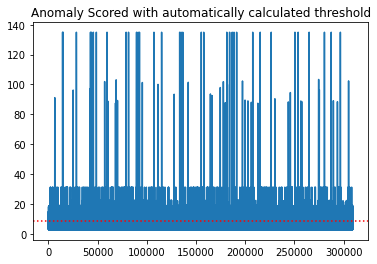

In [20]:
import seaborn as sns

plt.plot(y_train_scores);
plt.axhline(y=clf1.threshold_, c='r', ls = 'dotted', label = 'threshold')
plt.title('Anomaly Scored with automatically calculated threshold')

Text(0.5, 1.0, 'Data only with 2 dimension out of 44')

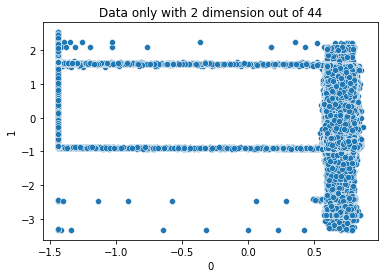

In [21]:
import seaborn as sns

sns.scatterplot(x=0, y=1, data=X_train)
plt.title('Data only with 2 dimension out of 44')

In [22]:
df_test = X_test.copy()
df_test['score'] = y_test_scores
df_test['cluster'] = np.where(df_test['score']<7.6, 0, 1)
df_test['cluster'].value_counts()

df_test.groupby('cluster').mean()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,score
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.101353,-0.112773,0.096566,0.118144,-0.084198,0.032271,-0.013904,-0.146656,0.115124,0.115237,...,0.279672,0.281326,0.281205,0.282886,0.280537,0.183992,0.280059,-0.103175,-0.096067,4.320391
1,-0.786215,0.874802,-0.749078,-0.916463,0.653139,-0.250335,0.107856,1.137641,-0.893038,-0.893912,...,-2.169464,-2.182298,-2.181362,-2.194398,-2.176175,-1.427260,-2.172468,0.800346,0.745207,14.197092


In [23]:
from pyod.utils.data import evaluate_print

clf_name='AutoEncoder'
y_train_pred = clf1.labels_
y_train_scores = clf1.decision_scores_
y_test_pred = clf1.predict(X_test)
y_test_scores = clf1.decision_function(X_test)

In [24]:
print('\nOn Training Data:')
evaluate_print(clf_name, y_train, y_train_scores)
print('\nOn Test Data:')
evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
AutoEncoder ROC:0.8902, precision @ rank n:0.7166

On Test Data:
AutoEncoder ROC:0.8911, precision @ rank n:0.7223


In [25]:
import sklearn
from sklearn.metrics import roc_auc_score

sklearn.metrics.roc_auc_score(y_test, y_test_scores)

0.891137146734467

In [26]:
df_test['cluster'].value_counts()

0    117405
1     15135
Name: cluster, dtype: int64

In [27]:
# Python script for confusion matrix creation.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
actual =  y_test
predicted = y_test_pred

results = confusion_matrix(actual, predicted)
print ('Confusion Matrix :')
print(results)
print ('Accuracy Score :',accuracy_score(actual, predicted))
print('Classification Report : ')
print (classification_report(actual, predicted))

Confusion Matrix :
[[114421   2025]
 [  4831  11263]]
Accuracy Score : 0.9482722197072582
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    116446
           1       0.85      0.70      0.77     16094

    accuracy                           0.95    132540
   macro avg       0.90      0.84      0.87    132540
weighted avg       0.95      0.95      0.95    132540



In [28]:
!pip install keras
import keras

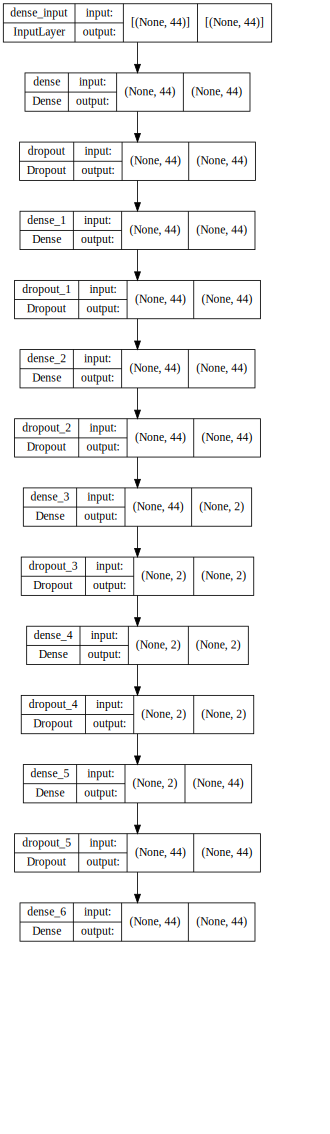

In [29]:
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

SVG(model_to_dot(clf1.model_, show_shapes=True, show_layer_names=True, dpi=60, rankdir='TB').create('dot', format='svg'))